In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)

%matplotlib inline

In [2]:
os.listdir('.')

['output_15_3.png',
 'sensitivity_plot.ipynb',
 'exclusion_version',
 'output_21_1.png',
 'notebook.tex',
 'changing_kaut',
 'wide_params',
 '.ipynb_checkpoints',
 'output_21_2.png',
 'output_15_1.png',
 'dsim.info',
 'output_8_0.png',
 'Figures',
 'model_io',
 'sensitivities.txt',
 'output_28_1.png',
 'output_28_2.png',
 'results.txt',
 'output_21_0.png',
 'output_21_3.png',
 'output_8_2.png',
 'output_8_3.png',
 'dtw',
 'output_28_3.png',
 'output_15_2.png',
 'output_15_0.png',
 'output_28_0.png',
 'exc_kaut',
 'output_8_1.png']

## Sensitivities with variable k_aut with healthy data

In [3]:
df = pd.read_csv('changing_kaut/healthy/sensitivities.txt', sep='\t')

In [4]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
1,a_n,-11.853961,105.002491,111.016075,7.232307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
111,Vol_mit,-8.856016,98.352299,109.465507,9.274661,-2064.058660,2377.276223,20874.757009,4055.438929,-0.017834,0.029248,0.169874,0.031256,-89.171678,146.237553,8.493724e+02,1.589733e+02
74,p_tot,8.608443,80.864923,139.206384,22.245532,-4276.201774,4734.054588,41277.432255,8105.442008,-0.016677,0.097109,0.384867,0.076064,-83.382730,485.543723,1.924334e+03,3.571968e+02
15,cytox_tot_tis,31.015740,77.547692,98.093174,13.302004,-1982.966706,2376.052645,20539.971201,4014.979147,-0.028049,0.045349,0.192823,0.037276,-140.246187,226.744498,9.641137e+02,1.810891e+02
91,r_t,-27.839186,71.732887,118.862633,18.669113,41016.816237,47283.116326,204260.828210,39871.402457,3.763664,5.214389,32.088430,6.024723,18818.321942,26071.944593,1.604422e+05,3.188078e+04
82,phi,-9.819999,56.621562,146.513626,26.737227,-1278.000828,3496.421120,16404.148812,3170.729687,0.279931,0.594317,3.795461,0.691000,1399.657274,2971.585490,1.897731e+04,3.765838e+03
109,v_pn,-22.620033,50.146373,144.159346,27.263765,-34905.273115,35432.575752,315999.717476,61563.936827,-0.177483,0.321850,0.593282,0.099694,-887.416923,1609.251739,2.966410e+03,4.965167e+02
83,r_0,-4.043245,46.449894,97.703193,16.570938,17912.581341,24743.065708,121667.419324,22983.474333,4.960963,5.361469,36.344870,6.932644,24804.814897,26807.344150,1.817243e+05,3.574539e+04
100,T_max0,6.342851,40.474530,108.919209,19.694341,2569.773194,22044.699928,126141.080580,25365.827808,-0.244521,0.575777,2.313640,0.445376,-1222.606900,2878.885211,1.156820e+04,2.134106e+03
20,Dp_n,12.868313,39.442272,64.580475,10.178668,-1987.179861,2280.839306,20487.734236,3939.826149,2.056136,2.083587,20.587105,4.013332,10280.682041,10417.936855,1.029355e+05,1.955580e+04


In [5]:
df.shape

(121, 17)

In [6]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [7]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [8]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    
    return ax, df_norm, sensitive_parameters

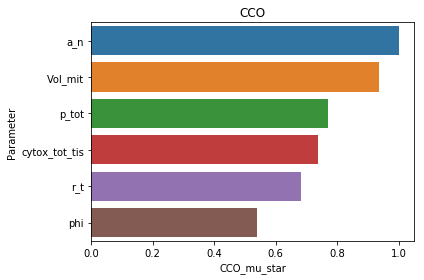

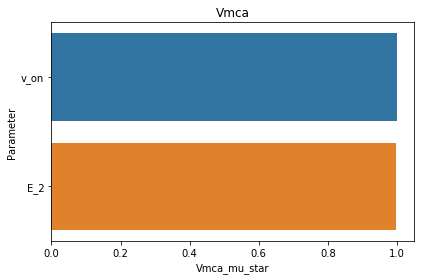

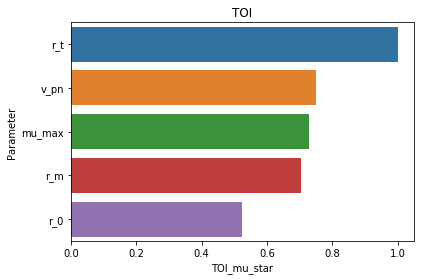

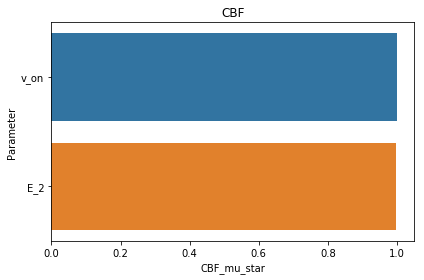

In [9]:
sens_params_euclidean = []
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean.extend(list(sens_p))


## Sensitivities with variable k_aut with impaired data

In [10]:
df = pd.read_csv('changing_kaut/impaired/sensitivities.txt', sep='\t')

In [11]:
df.shape

(121, 17)

In [12]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [13]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [14]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

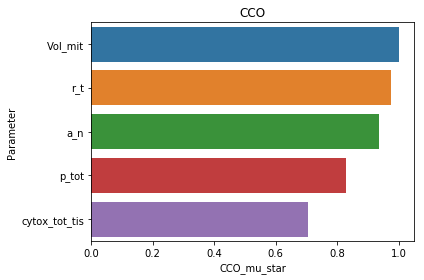

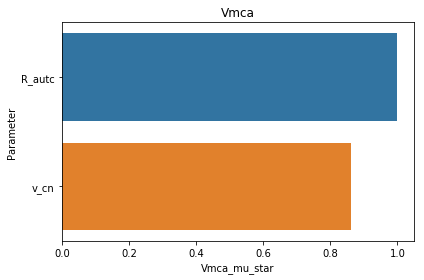

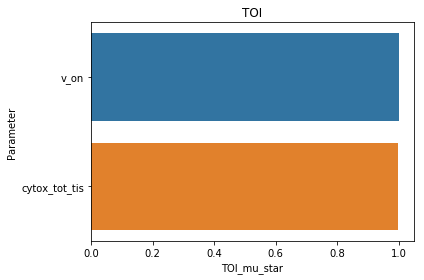

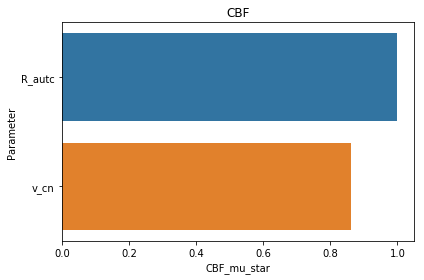

In [15]:
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean.extend(list(sens_p))


## Sensitivities with variable k_aut with healthy data - DTW

In [18]:
df = pd.read_csv('dtw/healthy/sensitivities.txt', sep='\t')

In [19]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
91,r_t,-60.075021,171.309789,288.389493,47.580814,1.662952e+04,7.140690e+04,3.281000e+05,6.181138e+04,9.732750e+00,3.627864e+02,2.409973e+03,4.451857e+02,4.866375e+04,1.813932e+06,1.204986e+07,2.309638e+06
111,Vol_mit,29.543255,155.883392,198.943210,24.900785,-1.468025e+08,1.504265e+08,1.486434e+09,2.803890e+08,-5.625194e+01,6.665789e+01,6.153722e+02,1.140178e+02,-2.812597e+05,3.332895e+05,3.076861e+06,5.967178e+05
1,a_n,72.166673,152.488973,166.084253,18.581020,-1.790525e-08,1.790525e-08,1.790525e-07,3.588627e-08,1.632319e-09,1.632319e-09,1.632319e-08,3.247471e-09,8.161593e-06,8.161593e-06,8.161593e-05,1.555788e-05
109,v_pn,-42.933615,139.915504,330.832583,59.433043,-1.186842e+06,1.252560e+06,1.215242e+07,2.369830e+06,4.081364e+04,4.081427e+04,4.081222e+05,8.051529e+04,2.040682e+08,2.040714e+08,2.040611e+09,4.082730e+08
83,r_0,-30.471608,121.869212,239.644707,39.723210,2.541391e+03,4.246828e+04,2.204136e+05,4.163427e+04,-1.287668e+11,1.287668e+11,1.287668e+12,2.391292e+11,-6.438341e+14,6.438341e+14,6.438341e+15,1.283002e+15
115,Xtot,46.846754,120.883370,257.875213,45.835434,1.680187e+05,1.837813e+05,1.550985e+06,2.929854e+05,-1.757528e+02,1.765447e+02,1.759246e+03,3.285620e+02,-8.787641e+05,8.827235e+05,8.796232e+06,1.723294e+06
89,r_m,-18.174650,104.302378,232.889383,39.929707,-5.028749e+04,1.842916e+05,8.587105e+05,1.619226e+05,-4.664783e+00,9.347235e+00,6.496623e+01,1.312257e+01,-2.332391e+04,4.673618e+04,3.248311e+05,5.852978e+04
15,cytox_tot_tis,32.182653,90.767351,180.537088,30.551447,-1.286208e+06,1.287131e+06,1.270552e+07,2.397171e+06,-9.699669e-01,4.159114e+00,2.441863e+01,4.701140e+00,-4.849835e+03,2.079557e+04,1.220931e+05,2.361441e+04
20,Dp_n,0.882592,68.750396,187.788477,34.814740,9.536559e+01,5.104525e+02,1.290794e+03,2.303625e+02,5.559958e-02,1.212933e-01,4.701469e-01,8.653498e-02,2.779979e+02,6.064663e+02,2.350734e+03,4.293725e+02
44,K_sigma,3.735383,67.930050,176.912745,31.910815,-5.502863e+04,1.372312e+05,1.000957e+06,1.885856e+05,-1.073856e+06,1.073856e+06,1.073849e+07,2.051176e+06,-5.369280e+09,5.369282e+09,5.369245e+10,1.098076e+10


In [20]:
df.shape

(121, 17)

In [21]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [22]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [23]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/dtw/healthy/narrow_range/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    
    return ax, df_norm, sensitive_parameters

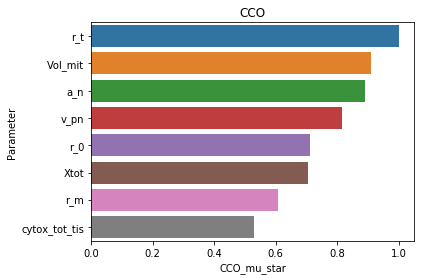

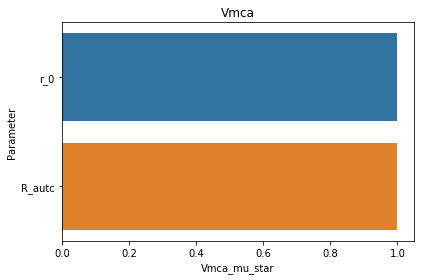

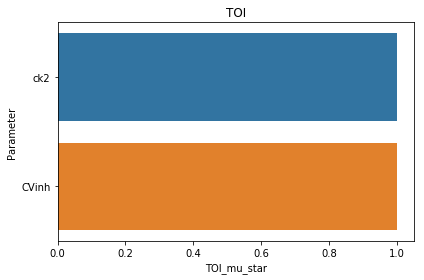

In [24]:
sens_params_dtw_narrow = []
for o in ["CCO", "Vmca", "TOI"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_dtw_narrow.extend(list(sens_p))


## Sensitivities with variable k_aut with impaired data - DTW

In [25]:
df = pd.read_csv('dtw/impaired/sensitivities.txt', sep='\t')

In [26]:
df.shape

(121, 17)

In [27]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [28]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [29]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/dtw/impaired/narrow_range/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

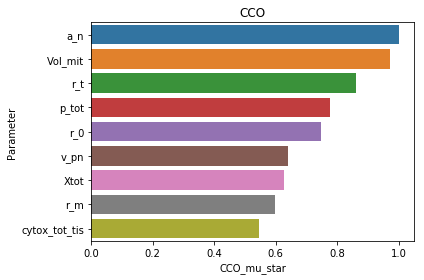

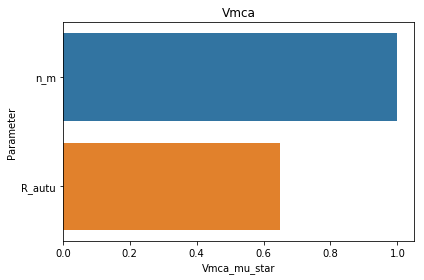

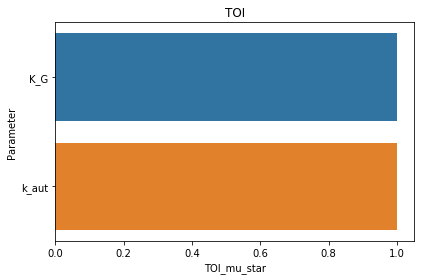

In [30]:
for o in ["CCO", "Vmca", "TOI"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_dtw_narrow.extend(list(sens_p))


## Sensitivities with variable k_aut with healthy data over wide range

In [16]:
df = pd.read_csv('wide_params/healthy/euclidean/sensitivities.txt', sep='\t')

In [17]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
111,Vol_mit,60.039974,153.463521,206.643519,28.755384,9.225093e+04,9.412870e+04,8.474790e+05,1.604915e+05,-1.570275e+01,1.662802e+01,1.597761e+02,3.081621e+01,-7.851375e+04,8.314008e+04,7.988807e+05,1.613180e+05
1,a_n,33.024416,143.986754,170.979000,19.450674,1.608280e-08,1.608280e-08,1.608280e-07,3.102718e-08,6.904820e-10,6.904820e-10,6.904820e-09,1.359324e-09,3.452410e-06,3.452410e-06,3.452410e-05,6.635659e-06
91,r_t,13.094456,140.595083,267.236672,44.665002,-5.615963e+04,2.456234e+05,1.576303e+06,2.968669e+05,2.118372e+00,2.975850e+00,1.269963e+01,2.465890e+00,1.059186e+04,1.487925e+04,6.349817e+04,1.207537e+04
83,r_0,-85.587826,123.608865,265.272123,49.076367,-1.279210e+05,1.966192e+05,1.612714e+06,3.172361e+05,2.786929e+00,3.632147e+00,1.977885e+01,3.795758e+00,1.393464e+04,1.816073e+04,9.889425e+04,1.980578e+04
115,Xtot,2.694417,119.108945,246.603398,43.728926,-6.438186e+03,3.010296e+04,1.784858e+05,3.575522e+04,-9.576893e-02,6.130031e-01,1.442176e+00,2.574552e-01,-4.788447e+02,3.065015e+03,7.210881e+03,1.228076e+03
74,p_tot,28.288878,93.297711,207.243749,37.507477,-1.970907e+06,1.973507e+06,1.939395e+07,3.667848e+06,2.077854e+01,2.357776e+01,1.926612e+02,3.944091e+01,1.038927e+05,1.178888e+05,9.633062e+05,1.818279e+05
109,v_pn,-27.648829,89.306022,211.138940,39.064648,-9.268293e+02,4.013300e+03,1.328844e+04,2.582562e+03,3.381937e+00,2.603064e+01,1.794410e+02,3.620586e+01,1.690968e+04,1.301532e+05,8.972051e+05,1.647151e+05
15,cytox_tot_tis,7.744935,88.079317,151.542990,23.820203,-3.183999e+05,3.293251e+05,3.230493e+06,6.277209e+05,5.179898e+01,5.630179e+01,5.341294e+02,1.029442e+02,2.589949e+05,2.815089e+05,2.670647e+06,5.334314e+05
20,Dp_n,6.172562,79.454250,187.078869,32.407490,2.556908e+04,2.687438e+04,2.568280e+05,5.205317e+04,2.682813e+00,3.108693e+00,2.774387e+01,5.307734e+00,1.341406e+04,1.554347e+04,1.387193e+05,2.749420e+04
100,T_max0,28.651075,74.615116,170.966833,30.577165,4.790884e+06,4.792986e+06,4.790260e+07,9.282647e+06,-2.884531e+01,5.845490e+01,3.169448e+02,6.290588e+01,-1.442265e+05,2.922745e+05,1.584724e+06,3.042835e+05


In [18]:
df.shape

(121, 17)

In [19]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [20]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [21]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    
    return ax, df_norm, sensitive_parameters

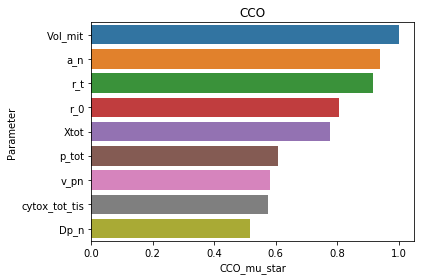

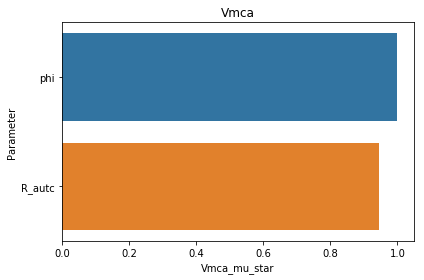

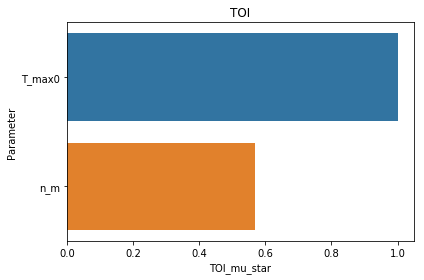

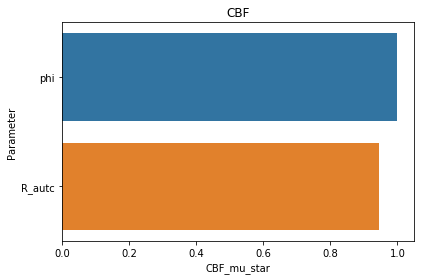

In [22]:
sens_params_euclidean_wide = []
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean.extend(list(sens_p))


## Sensitivities with variable k_aut with impaired data

In [23]:
df = pd.read_csv('wide_params/impaired/euclidean/sensitivities.txt', sep='\t')

In [24]:
df.shape

(121, 17)

In [25]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [26]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [27]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

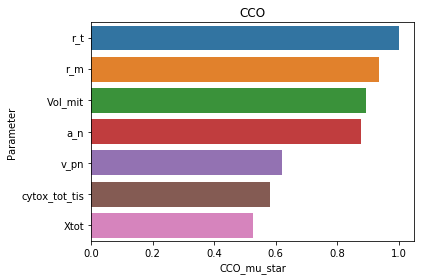

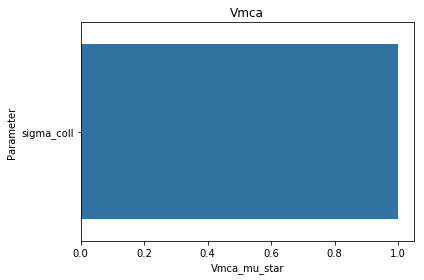

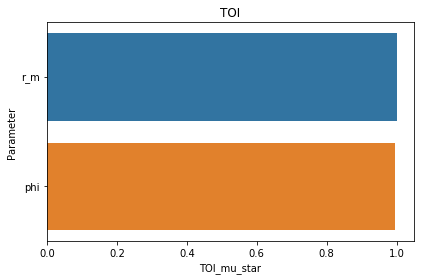

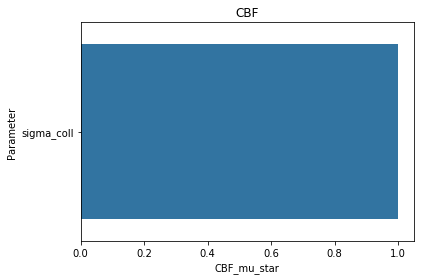

In [28]:
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean_wide.extend(list(sens_p))


## Sensitivities for constant k_aut

In [29]:
df = pd.read_csv('exc_kaut/k_Aut_1/sensitivities.txt', sep='\t')

In [30]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [31]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [32]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_1_0/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

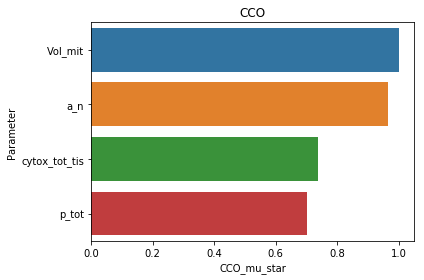

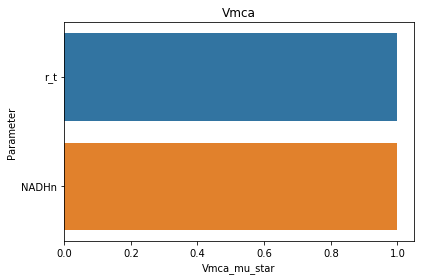

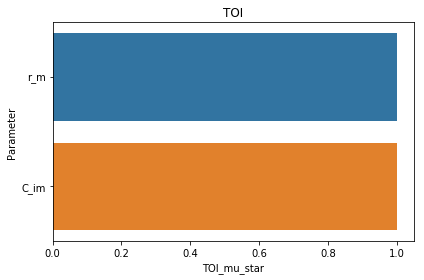

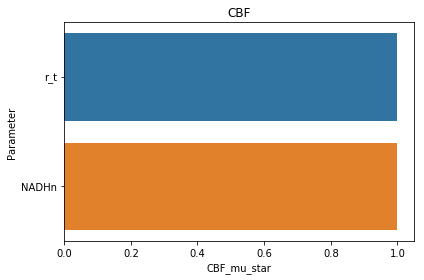

In [33]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm

## k_Aut fixed in range around 0.7

In [34]:
df = pd.read_csv('exc_kaut/k_Aut_0_7/sensitivities.txt', sep='\t')

In [35]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
2,a_n,23.534467,104.657099,109.759162,7.328488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
111,Vol_mit,25.424437,103.172239,110.647691,8.884944,-460.801967,460.807989,1757.224781,344.130203,-21.336514,21.372655,205.971983,41.946353,-1.066826e+05,1.068633e+05,1.029860e+06,2.023880e+05
16,cytox_tot_tis,25.468882,82.510037,113.357778,16.129282,12852.398996,15363.712771,86092.630021,17332.775227,0.120675,0.300551,1.522081,0.286463,6.033753e+02,1.502756e+03,7.610406e+03,1.411822e+03
91,r_t,-55.412820,77.829196,120.274741,20.717194,12081.729151,18716.936907,83050.918625,15895.346355,-445.862531,505.455550,4758.684374,907.693096,-2.229313e+06,2.527278e+06,2.379342e+07,4.579828e+06
74,p_tot,-10.985767,75.186689,132.411209,21.451378,-16624.938562,18098.899922,172269.433270,33365.398702,-28.164362,28.220448,280.854732,51.538914,-1.408218e+05,1.411022e+05,1.404274e+06,2.541111e+05
83,r_0,-16.303321,38.094559,88.328824,15.991410,19918.081926,46200.472660,223629.916663,43459.015482,1.367598,3.296348,16.494767,3.129898,6.837990e+03,1.648174e+04,8.247384e+04,1.619685e+04
89,r_m,-6.009196,37.095231,87.520636,15.489419,-12701.358668,37912.124201,190439.925891,38320.725467,1.773294,2.318210,14.466876,2.848801,8.866472e+03,1.159105e+04,7.233438e+04,1.399943e+04
21,Dp_n,15.486550,36.903906,55.389988,8.383467,4787.563552,4909.462481,44568.801101,8580.177470,0.058973,0.078620,0.479306,0.093787,2.948634e+02,3.931005e+02,2.396531e+03,4.605238e+02
62,NADHn,-15.728792,35.177536,48.593685,7.153215,105.304854,105.668784,130.747759,26.077800,-0.007215,0.007215,0.013789,0.002584,-3.607689e+01,3.607689e+01,6.894438e+01,1.347184e+01
65,NADpool,20.168260,32.837719,42.333602,6.554903,-766.559585,1133.690818,8944.525594,1764.060964,0.043177,0.044713,0.372998,0.073340,2.158857e+02,2.235659e+02,1.864991e+03,3.583435e+02


In [36]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [37]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [38]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_0_7/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

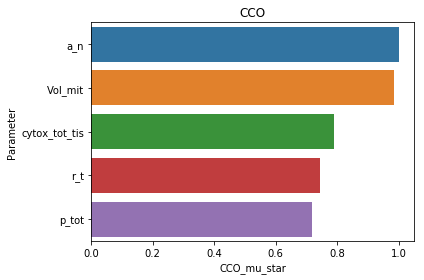

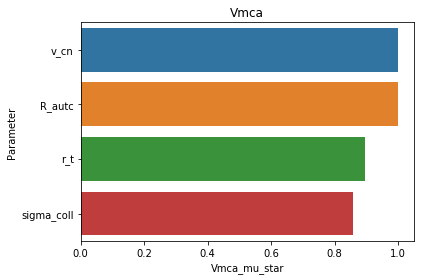

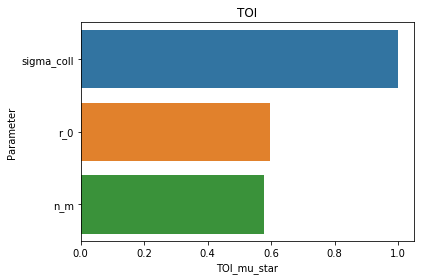

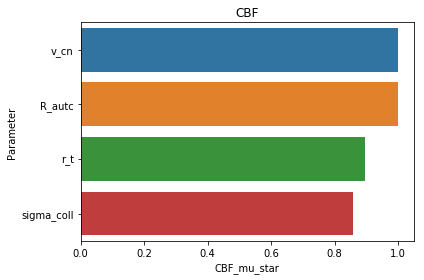

In [39]:
normed_dfs = {}

for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm

# NRMSE Sensitivities
## Healthy

In [40]:
df = pd.read_csv('wide_params/healthy/sensitivities.txt', sep='\t')

In [41]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
91,r_t,40.139732,191.539881,363.397826,59.043184,-9.713001e+03,1.068937e+04,6.840412e+04,1.344346e+04,3.351940e+08,3.351941e+08,3.351938e+09,6.266680e+08,3.351940e+08,3.351941e+08,3.351938e+09,6.305852e+08
89,r_m,-7.764063,169.444173,381.375895,66.688641,1.014127e+03,2.350266e+03,1.225922e+04,2.279642e+03,7.345800e+02,8.753355e+02,7.745139e+03,1.487980e+03,7.345800e+02,8.753355e+02,7.745139e+03,1.465045e+03
1,a_n,40.541200,151.566765,182.986721,20.564801,1.628111e-08,1.628111e-08,1.628111e-07,3.139383e-08,-5.340791e-11,5.340791e-11,5.340791e-10,1.064953e-10,-5.340799e-11,5.340799e-11,5.340799e-10,1.033520e-10
111,Vol_mit,59.453521,146.573527,205.089723,30.565075,4.306042e+01,5.271908e+01,2.627423e+02,5.162336e+01,8.782436e+01,4.180258e+02,2.811965e+03,5.482897e+02,8.782436e+01,4.180258e+02,2.811965e+03,5.347750e+02
100,T_max0,64.705803,118.527433,334.841638,64.946686,1.923534e+01,5.279754e+01,1.697360e+02,3.119942e+01,-1.820774e+02,2.397198e+02,1.866508e+03,3.683206e+02,-1.820774e+02,2.397198e+02,1.866508e+03,3.765167e+02
109,v_pn,-26.096262,112.386724,327.290683,63.049775,1.342424e+03,1.374689e+03,1.289739e+04,2.595267e+03,5.066717e+02,1.114588e+03,7.376231e+03,1.407497e+03,5.066717e+02,1.114588e+03,7.376231e+03,1.429405e+03
15,cytox_tot_tis,36.698256,110.662079,220.146352,35.860514,-1.275731e+02,1.512770e+02,9.830567e+02,1.909109e+02,5.059817e+00,9.251539e+00,3.869939e+01,7.229529e+00,5.059817e+00,9.251539e+00,3.869939e+01,7.359289e+00
83,r_0,-47.797338,109.555351,236.988993,41.214799,2.448179e+11,2.448296e+11,2.448238e+12,4.909503e+11,1.134238e+02,1.389820e+02,7.837337e+02,1.525626e+02,1.134238e+02,1.389820e+02,7.837337e+02,1.557556e+02
115,Xtot,-29.898289,109.107143,246.072237,45.124919,-3.349407e+02,2.773943e+03,1.934644e+04,3.569245e+03,6.702444e+02,6.989852e+02,6.487797e+03,1.288777e+03,6.702444e+02,6.989852e+02,6.487797e+03,1.259170e+03
20,Dp_n,-22.209100,105.940489,248.569865,44.590417,3.773424e+03,3.916172e+03,3.841454e+04,7.511880e+03,-1.981000e+02,2.039387e+02,1.695022e+03,3.373761e+02,-1.981000e+02,2.039387e+02,1.695022e+03,3.441762e+02


In [42]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [43]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [44]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

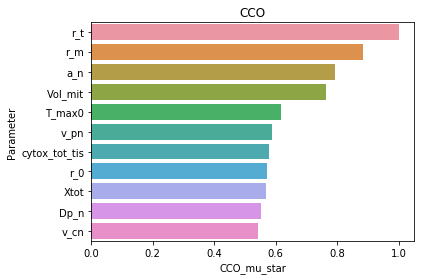

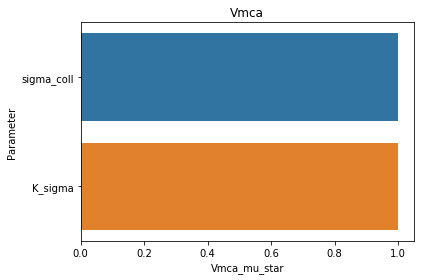

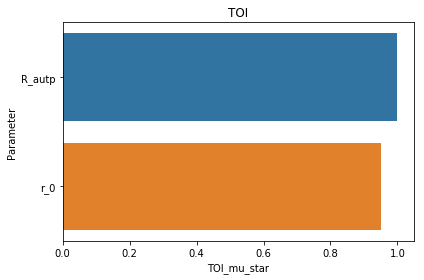

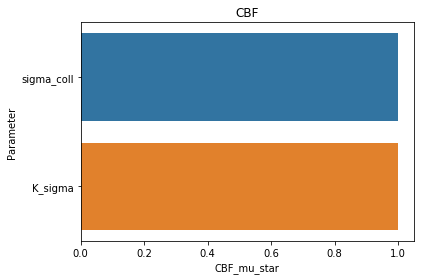

In [45]:
normed_dfs = {}
sens_params_NRMSE = []
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    normed_dfs[o]=df_norm
    sens_params_NRMSE.extend(list(sens_p))

## Impaired

In [46]:
df = pd.read_csv('wide_params/impaired/sensitivities.txt', sep='\t')

In [47]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [48]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [49]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

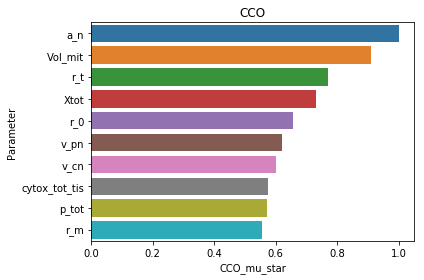

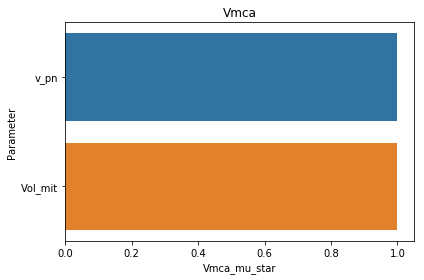

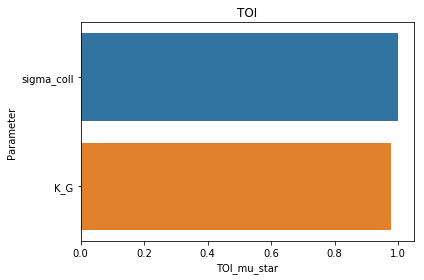

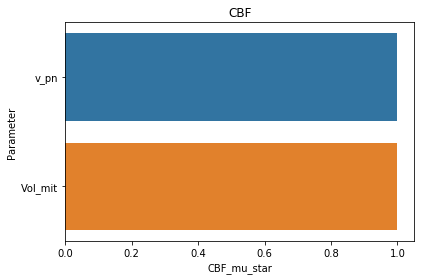

In [50]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    normed_dfs[o]=df_norm
    sens_params_NRMSE.extend(list(sens_p))

## Comparing NRMSE vs Euclidean

In [51]:
euc = set(list(sens_params_euclidean_wide))

nrmse = set(list(sens_params_NRMSE))

print(euc)
print(nrmse)

{'a_n', 'mu_max', 'R_autc', 'n_m', 'r_t', 'E_2', 'phi', 'r_m', 'v_cn', 'r_0', 'Dp_n', 'Xtot', 'p_tot', 'T_max0', 'v_on', 'v_pn', 'cytox_tot_tis', 'Vol_mit'}
{'a_n', 'R_autp', 'r_t', 'r_m', 'K_G', 'v_cn', 'p_tot', 'K_sigma', 'r_0', 'Xtot', 'Dp_n', 'sigma_coll', 'T_max0', 'v_pn', 'cytox_tot_tis', 'Vol_mit'}


In [52]:
euc.intersection(nrmse)

{'Dp_n',
 'T_max0',
 'Vol_mit',
 'Xtot',
 'a_n',
 'cytox_tot_tis',
 'p_tot',
 'r_0',
 'r_m',
 'r_t',
 'v_cn',
 'v_pn'}

In [53]:
print(euc.difference(nrmse))
print(nrmse.difference(euc))

{'mu_max', 'R_autc', 'n_m', 'E_2', 'phi', 'v_on'}
{'K_sigma', 'K_G', 'sigma_coll', 'R_autp'}


In [54]:
print(list(nrmse))

['a_n', 'R_autp', 'r_t', 'r_m', 'K_G', 'v_cn', 'p_tot', 'K_sigma', 'r_0', 'Xtot', 'Dp_n', 'sigma_coll', 'T_max0', 'v_pn', 'cytox_tot_tis', 'Vol_mit']


## Comparing Euclidean vs Euclidean_wide

In [55]:
euc = set(list(sens_params_euclidean))

euc_wide = set(list(sens_params_euclidean_wide))

print(euc)
print(euc_wide)

{'a_n', 'mu_max', 'R_autc', 'n_m', 'r_t', 'E_2', 'phi', 'r_m', 'v_cn', 'r_0', 'Dp_n', 'Xtot', 'p_tot', 'T_max0', 'v_on', 'v_pn', 'cytox_tot_tis', 'Vol_mit'}
{'a_n', 'r_t', 'r_m', 'phi', 'Xtot', 'sigma_coll', 'v_pn', 'cytox_tot_tis', 'Vol_mit'}


In [56]:
euc.intersection(euc_wide)

{'Vol_mit', 'Xtot', 'a_n', 'cytox_tot_tis', 'phi', 'r_m', 'r_t', 'v_pn'}

In [57]:
print(euc.difference(euc_wide))
print(euc_wide.difference(euc))

{'mu_max', 'R_autc', 'n_m', 'E_2', 'v_cn', 'r_0', 'Dp_n', 'T_max0', 'v_on', 'p_tot'}
{'sigma_coll'}


In [58]:
print(list(euc_wide))

['a_n', 'r_t', 'r_m', 'phi', 'Xtot', 'sigma_coll', 'v_pn', 'cytox_tot_tis', 'Vol_mit']
